In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('banknote_authentication.csv')

In [3]:
data.shape

(1372, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
X=data.drop('class', axis=1)

In [7]:
y=data['class']

In [8]:
#Spliting training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

In [11]:
print(len(X_train), len(X_test))

1097 275


In [12]:
#import the decision tree classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
classifier = DecisionTreeClassifier()

In [15]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [18]:
#Analyzing the result by confusion matrics

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
cm = confusion_matrix(y_test, y_pred)

In [21]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[153   4]
 [  3 115]]


In [22]:
print("Accuracy Score: " ,accuracy_score(y_test,y_pred)*100)

Accuracy Score:  97.45454545454545


In [23]:
#Classificiation Report 

In [24]:
print("Classification Report: \n ", classification_report(y_test,y_pred))

Classification Report: 
                precision    recall  f1-score   support

           0       0.98      0.97      0.98       157
           1       0.97      0.97      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [25]:
#Check model for single value

In [26]:
new=[[-2.0285,3.8468,-0.63435,-1.175]]

if classifier.predict(new)[0]==1:
    print("Original Note")
else:
    print("Fake Note")

Original Note


C:\Users\Kiran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0, 0.5, 'Original'), Text(0, 1.5, 'Fake')]

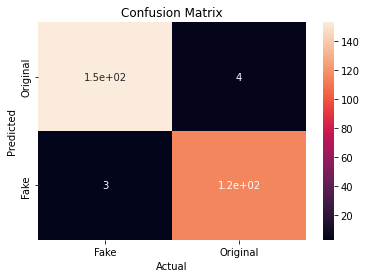

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
#annot=True to annotate cells

ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Fake','Original'])
ax.yaxis.set_ticklabels(['Original','Fake'])

In [28]:
#visualizing decision tree

In [30]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [31]:
dot_data = StringIO()

In [32]:
export_graphviz(classifier,out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [34]:
graph.write_png('bank_tree.png')

True